<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #E8F6EF; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #d81313; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">📊 Guide of Outliers: Exploring with Z-Score Method 📈</h1>
</div>

<div style="box-shadow: 5px 5px 10px pink; border: 2px solid #D35400; border-radius: 10px; padding: 20px;">


<h3 style="color:#D35400; font-weight:bold;">ABOUT THE AUTHOR</h3>

I am <b>Zeeshan Younas</b>, a passionate data scientist dedicated to mastering machine learning techniques and continually expanding my knowledge base. I believe in #KeepLearning and #KeepSupporting to keep growing and helping others in the field! 🌟.<br><br>

<img src="https://media.licdn.com/dms/image/D4D03AQG5iDKRRJFsCQ/profile-displayphoto-shrink_200_200/0/1714460771099?e=1720051200&v=beta&t=v8MfJW0-fdwbuOjHePjBMSdor0Nq5PhBhrpAtXhljlk" alt="Profile Picture" style="width: 100px; height: 100px; border-radius: 50%;"><br>
You can find more about me on my <a href="https://github.com/Zeeshan5932/project" target="_blank">GitHub</a> and <a href="https://www.linkedin.com/in/zeeshan-younas-919a09253/" target="_blank">LinkedIn</a>.<br>
Feel free to connect and reach out for any collaboration or queries!

</div>


# Define:

<b>Outliers<b> are data points that significantly differ from other observations in a dataset. They can skew statistical analyses and distort the overall picture of the data. <b>

**For example,** 

consider a dataset of salaries in a company where most employees earn between $30,000 and $100,000 per year. If there is one employee who earns $1,000,000 per year, that data point would be considered an outlier because it deviates significantly from the typical range of salaries in the dataset. Outliers like this can impact calculations like the mean (average) salary, making it higher than what's representative of the majority of employees.



| Advantages                      | Disadvantages                                   |
|---------------------------------|-------------------------------------------------|
| 1. Highlighting anomalies      | 1. Skewing statistical analyses                 |
|    - Identify errors or rare events       |    - Distortions in mean, standard deviation, etc.     |
| 2. Improving robustness         | 2. Reducing predictive accuracy                 |
|    - Robustness in resistant statistical methods  |    - Adverse effect on machine learning algorithms    |
|                                 | 3. Decreasing model interpretability           |
|                                    |    - Obscuring underlying patterns and relationships |


_____________


## Method to Detect outliers


1. **Calculate basic statistics:** Find the mean, median, standard deviation, and quartiles (Q1 and Q3) of the data.
2. **Compute Z-scores:** Calculate the Z-score for each data point to measure how many standard deviations it is away from the mean.
3. **Interquartile Range (IQR) method:** Calculate the IQR (Q3 - Q1), then determine the lower and upper bounds for outliers as Q1 - 1.5 * IQR and Q3 + 1.5 * IQR respectively.
4. **Box plot:** Visualize the data distribution using a box plot to identify outliers outside the whiskers.
5. **Histogram:** Plot a histogram to examine the frequency distribution and identify any unusual patterns or spikes.
6. **Contextual assessment:** Consider the domain knowledge and context of the data to determine if identified outliers are valid or errors that need further investigation.


>___Use__:
In this, we can use the z-score method to find outliers

## Z-score

The Z-score, also known as the standard score, measures how many standard deviations a data point is away from the mean of a dataset. It's calculated using the formula:

### Mathematical equation:

$$
Z = \frac{(X - \mu)}{\sigma}
$$


Where:
- \( Z \) is the Z-score.
- \( X \) is the individual data point.
- \( \mu \) is the mean of the dataset.
- \( \sigma \) is the standard deviation of the dataset.%

A Z-score of 0 indicates that the data point's value is exactly at the mean. Positive Z-scores indicate that the data point is above the mean, while negative Z-scores indicate that the data point is below the mean.

<b>Identify<b>

Z-scores are useful for identifying outliers because they provide a standardized measure of how much a data point deviates from the mean. Typically, data points with Z-scores greater than a certain threshold (e.g., 2 or 3) are considered outliers.

![Alt text](https://www.researchgate.net/publication/318873062/figure/fig3/AS:568837446012928@1512632823992/The-relation-of-Z-score-and-p-value-Z-score-is-expressed-in-the-units-of-the-standard.png)


## Treatment of outliers

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQawMMn1eV-ElDAL6J8IMoTw-clBBPxvwR-orFKzZsH3g&s)



# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#f20c0f;">Importing libraries</p>

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.shape

(1000, 3)

In [5]:
df.sample(5)

,cgpa,placement_exam_marks,placed
761,8.02,6.0,0
501,6.52,31.0,0
194,8.19,33.0,0
494,6.83,51.0,0
671,7.45,31.0,0


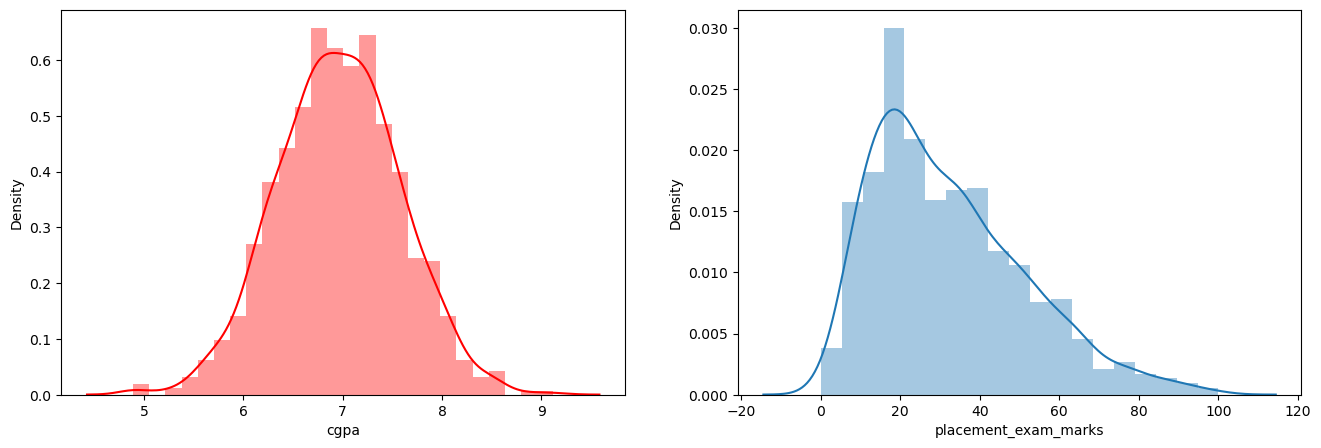

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'],color='red')

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [7]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [8]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [9]:
# Finding the boundary values
print("Highest allowed" , df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [10]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1



# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#f20c0f;">Trimming</p>

Trimming is a statistical technique where a certain percentage of extreme values, typically from both ends of a dataset, are removed before calculating statistics like the mean and standard deviation. This helps reduce the influence of outliers on the results while still maintaining a representative sample of the data.

<b> Why we use Trimmming? <b>


We use trimming to treat outliers because outliers can significantly skew statistical analyses, leading to inaccurate results. By trimming a certain percentage of extreme values from both ends of the dataset, we can reduce the impact of outliers without entirely disregarding them. This helps ensure that statistical measures such as the mean and standard deviation are more representative of the majority of the data, leading to more accurate and robust conclusions. Trimming allows us to mitigate the influence of outliers while still preserving the integrity of the dataset and maintaining the reliability of the analysis.

In [11]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [12]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [13]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [15]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [16]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [17]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [20]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [19]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363




# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#f20c0f;">Capping</p>

# Why Use Capping to Treat Outliers?

Capping is a method employed in data analysis to address outliers, which are data points that deviate significantly from the majority of the data. This technique involves setting predefined upper or lower limits, beyond which outlier values are adjusted or replaced.

## Benefits of Capping:

1. **Preserving Data Integrity:** Capping allows for the treatment of outliers without completely removing them, ensuring the overall integrity and structure of the dataset.

2. **Mitigating Impact:** Outliers can skew statistical analyses and distort results. Capping helps reduce their influence, making summary statistics more representative of the majority of the data.

3. **Improving Model Performance:** In predictive modeling, outliers can degrade model performance by introducing noise and bias. Capping outliers enhances model robustness and generalization.

4. **Aligning with Assumptions:** Some statistical methods assume certain data characteristics. Outliers can violate these assumptions, leading to biased estimates. Capping helps bring data closer to meeting these assumptions, ensuring the validity of analyses.

>__Overall__:
 capping outliers is a valuable technique for managing extreme values in datasets, enabling analysts to derive more accurate and reliable insights.


In [21]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [22]:
lower_limit

5.113546374602832

In [23]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [24]:
df.shape

(1000, 4)

In [25]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

# <span style="color: yellow; text-shadow: 3px 3px 6px black; font-family:  Verdana; font-weight: bold;">Stay tuned for upcoming parts on outlier treatment techniques. In this first part, we explore the use of the Z-score method.</span>